<a href="https://colab.research.google.com/github/Anthony-Girard/NLP-Blog/blob/main/PHP_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHP 2650 - Statistical Learning and Big Data  
Spring 2022  
Andrew Huang, Anthony Girard, Stephanie Vartany  

# **Final Project Post: Dimension reduction of text data**

*  Which of Shakespeare’s plays is the shortest (on the page, not the stage)?
*  What words are commonly used together in customer food reviews?
*  What topics does Elon Musk tweet about at 4am local time?

These are all questions that can be answered through text mining and textual analysis. But given text data, how do we extract any information that could be useful for analysis?

In this blog post, we’ll explore three different text mining techniques for reducing the dimension of unstructured text data so that we can extract features that are relevant for subsequent analysis.

# **Intro to our dataset**

The dataset we will be using to implement each text mining algorithm is the BoolQ dataset (avaliable on [GitHub](https://github.com/google-research-datasets/boolean-questions)). This dataset was developed by Google Research to analyze naturally occuring yes/no questions. The training set contains 9427 triplets of a question, anwer, and passage. Each passage is a brief reading-comprehension-style passage. The question is some sort of yes/no question related to the passage, and the answer is a boolean true/false. Each example also contains a title, which is the title of the page that the passage comes from. We can take a look at the dataset below.

In [ ]:
library(tidyverse)

In [ ]:
df <- read.csv("train.csv")
dim(df)
head(df, 1)

[1] 9427    4

,question,title,answer,passage
,<chr>,<chr>,<chr>,<chr>
1,do iran and afghanistan speak the same language,Persian language,true,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its endonym Farsi (فارسی fārsi (fɒːɾˈsiː) ( listen)), is one of the Western Iranian languages within the Indo-Iranian branch of the Indo-European language family. It is primarily spoken in Iran, Afghanistan (officially known as Dari since 1958), and Tajikistan (officially known as Tajiki since the Soviet era), and some other regions which historically were Persianate societies and considered part of Greater Iran. It is written in the Persian alphabet, a modified variant of the Arabic script, which itself evolved from the Aramaic alphabet."


Below is a table for the top ten webpage titles by number of passages:

In [ ]:
df %>%
  group_by(title) %>%
  summarise(count=n()) %>%
  arrange(desc(count)) %>%
  head(10)

title,count
<chr>,<int>
List of backward compatible games for Xbox One,39
Drinking in public,22
Natural-born-citizen clause,22
Stand-your-ground law,22
Turn on red,20
Superfecundation,17
American entry into Canada by land,16
I Am Number Four (film),16
Once Upon a Time (season 7),16


The 9427 question and answer passages are sourced from 6611 unique webpages, with the most popular webpage (titled "List of backward compatible games for Xbox One") being the source of 39 questions and passages alone.

# **Three ways to dimension reduce this text**

## **1) N-grams**

### Bag of words, the word cloud

When doing textual analysis, one initial approach for dimension reduction is to identify the words that occur more or less frequently in the original text input. For this section, we can start by analyzing the following passages about dairy cattle:

In [ ]:
# pick a passage
df %>%
    filter(title=="Dairy cattle") %>%
    select(title, passage) %>%
    distinct()

title,passage
<chr>,<chr>
Dairy cattle,"The dairy cow will produce large amounts of milk in its lifetime. Production levels peak at around 40 to 60 days after calving. Production declines steadily afterwards until milking is stopped at about 10 months. The cow is ``dried off'' for about sixty days before calving again. Within a 12 to 14-month inter-calving cycle, the milking period is about 305 days or 10 months long. Among many variables, certain breeds produce more milk than others within a range of around 6,800 to 17,000 kg (15,000 to 37,500 lbs) of milk per year."
Dairy cattle,"To maintain lactation, a dairy cow must be bred and produce calves. Depending on market conditions, the cow may be bred with a ``dairy bull'' or a ``beef bull.'' Female calves (heifers) with dairy breeding may be kept as replacement cows for the dairy herd. If a replacement cow turns out to be a substandard producer of milk, she then goes to market and can be slaughtered for beef. Male calves can either be used later as a breeding bull or sold and used for veal or beef. Dairy farmers usually begin breeding or artificially inseminating heifers around 13 months of age. A cow's gestation period is approximately nine months. Newborn calves are removed from their mothers quickly, usually within three days, as the mother/calf bond intensifies over time and delayed separation can cause extreme stress on both cow and calf."
Dairy cattle,"The dairy cow will produce large amounts of milk in its lifetime. Production levels peak at around 40 to 60 days after calving. Production declines steadily afterwards until milking is stopped at about 10 months. The cow is ``dried off'' for about sixty days before calving again. Within a 12 to 14-month inter-calving cycle, the milking period is about 305 days or 10 months long. Among many variables, certain breeds produce more milk than others within a range of around 6,800 to 17,000 kg (15,000 to 37,500 lbs) of milk per year. The Holstein Friesian is the main breed of dairy cattle in Australia, and said to have the ``world's highest'' productivity, at 10000L of milk per year. The average for a single dairy cow in the US in 2007 was 9164.4 kg (20,204 lbs) per year, excluding milk consumed by her calves, whereas the same average value for a single cow in Israel was reported in the Philippine press to be 12,240 kg in 2009. High production cows are more difficult to breed at a two-year interval. Many farms take the view that 24 or even 36 month cycles are more appropriate for this type of cow."


In [ ]:
passages <- df %>%
    filter(title=="Dairy cattle") %>%
    select(passage) %>%
    distinct() %>%
    pull()

passages <- paste(unlist(passages),collapse="")
passages

[1] "The dairy cow will produce large amounts of milk in its lifetime. Production levels peak at around 40 to 60 days after calving. Production declines steadily afterwards until milking is stopped at about 10 months. The cow is ``dried off'' for about sixty days before calving again. Within a 12 to 14-month inter-calving cycle, the milking period is about 305 days or 10 months long. Among many variables, certain breeds produce more milk than others within a range of around 6,800 to 17,000 kg (15,000 to 37,500 lbs) of milk per year.To maintain lactation, a dairy cow must be bred and produce calves. Depending on market conditions, the cow may be bred with a ``dairy bull'' or a ``beef bull.'' Female calves (heifers) with dairy breeding may be kept as replacement cows for the dairy herd. If a replacement cow turns out to be a substandard producer of milk, she then goes to market and can be slaughtered for beef. Male calves can either be used later as a breeding bull or sold and used for veal or beef. Dairy farmers usually begin breeding or artificially inseminating heifers around 13 months of age. A cow's gestation period is approximately nine months. Newborn calves are removed from their mothers quickly, usually within three days, as the mother/calf bond intensifies over time and delayed separation can cause extreme stress on both cow and calf.The dairy cow will produce large amounts of milk in its lifetime. Production levels peak at around 40 to 60 days after calving. Production declines steadily afterwards until milking is stopped at about 10 months. The cow is ``dried off'' for about sixty days before calving again. Within a 12 to 14-month inter-calving cycle, the milking period is about 305 days or 10 months long. Among many variables, certain breeds produce more milk than others within a range of around 6,800 to 17,000 kg (15,000 to 37,500 lbs) of milk per year. The Holstein Friesian is the main breed of dairy cattle in Australia, and said to have the ``world's highest'' productivity, at 10000L of milk per year. The average for a single dairy cow in the US in 2007 was 9164.4 kg (20,204 lbs) per year, excluding milk consumed by her calves, whereas the same average value for a single cow in Israel was reported in the Philippine press to be 12,240 kg in 2009. High production cows are more difficult to breed at a two-year interval. Many farms take the view that 24 or even 36 month cycles are more appropriate for this type of cow."

If we reduce the passages to words, and look at the frequency distribution of each word we might get a sense of what the passages are about.

To do this, we will use the "tidytext" package in R:

In [ ]:
install.packages("tidytext")
library(tidytext)
library(ggplot2)

In [ ]:
df_words <- tibble(text = passages) %>%
    unnest_tokens(word, text) %>%
    count(word, sort = TRUE)

df_words %>%
  head(10)

word,n
<chr>,<int>
the,16
a,14
to,13
cow,11
of,11
dairy,9
milk,9
for,8
in,8


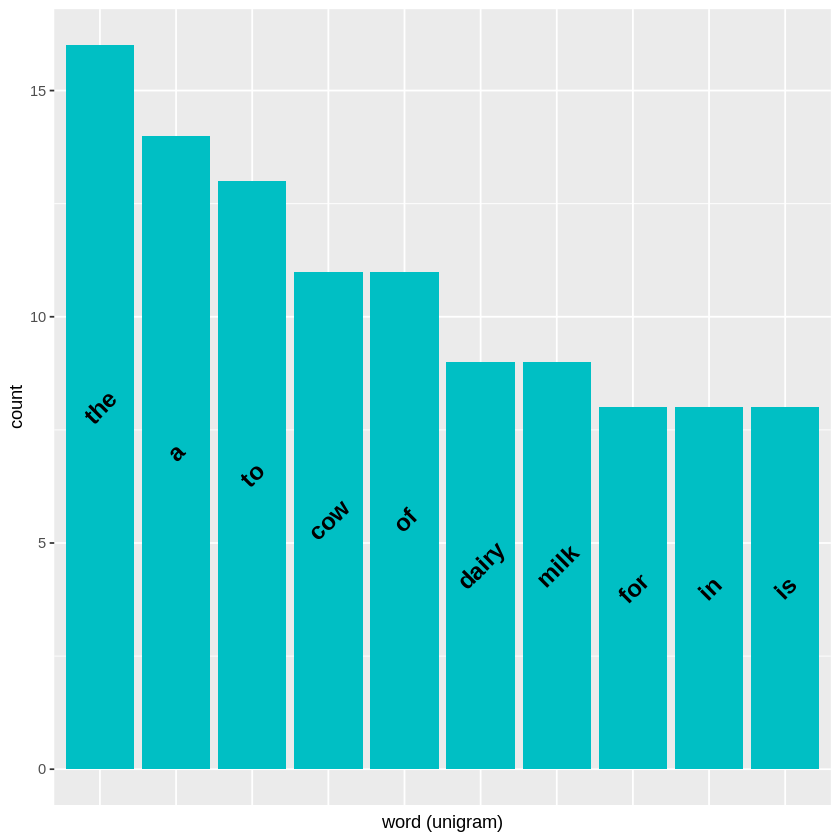

In [ ]:
ggplot(head(df_words, 10), aes(x=reorder(word, -n), y=n)) +
    geom_bar(stat="identity", fill=hcl(195,100,65)) +
    geom_text(aes(label=word, y=n*0.5), angle=45, colour="black", size=5, fontface='bold') +
    labs(x="word (unigram)", y="count") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

#### Removing stopwords

Uh oh! In English, there are syntax words that occur frequently and are not informative on their own, such as “a”, “an”, “the”, “and”, "or", "but". These are often referred to as **stopwords**.

It is useful to remove stopwords from the text before continuing with analysis:

In [ ]:
install.packages("quanteda")
library(quanteda)

In [ ]:
stopwords <- quanteda::stopwords("english")
stopwords

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "will"

In [ ]:
df_words2 <- tibble(text = passages) %>%
    unnest_tokens(word, text) %>%
    count(word, sort = TRUE) %>%
    filter(!word %in% stopwords)

df_words2 %>%
  head(10)

word,n
<chr>,<int>
cow,11
dairy,9
milk,9
days,7
calving,6
months,6
around,5
calves,5
produce,5


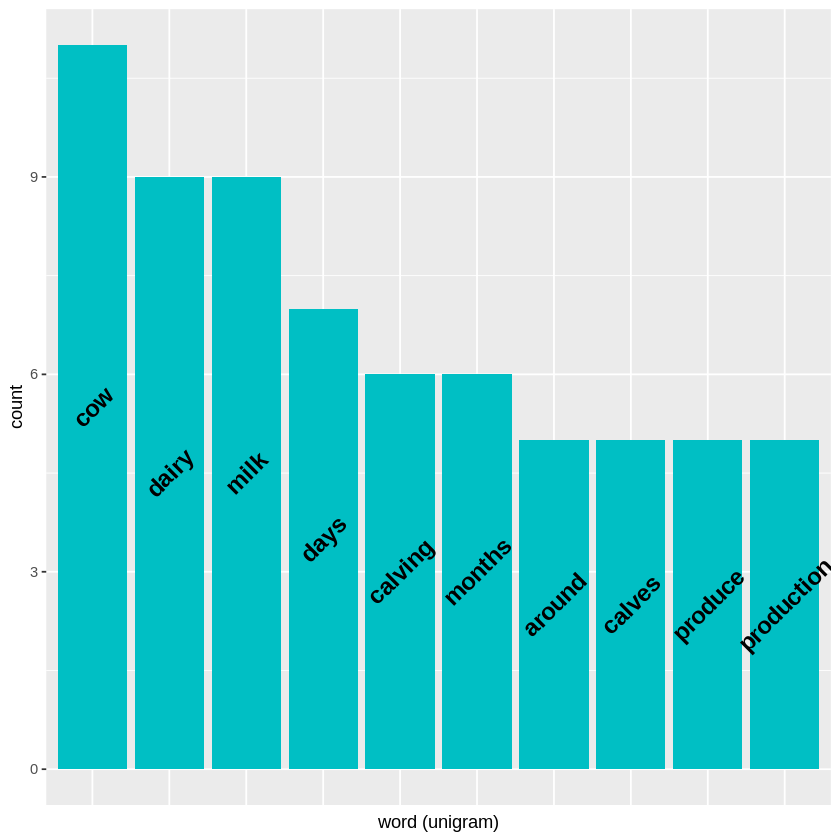

In [ ]:
ggplot(head(df_words2, 10), aes(x=reorder(word, -n), y=n)) +
    geom_bar(stat="identity", fill=hcl(195,100,65)) +
    geom_text(aes(label=word, y=n*0.5), angle=45, colour="black", size=5, fontface='bold') +
    labs(x="word (unigram)", y="count") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

Much better! After removing the stopwords, if we now look at the top 10 words by word frequency, we can figure out that the passages have something to do with the milk production of dairy cows.  

We can also visualize the words in a *wordcloud* using the "wordcloud" package in R:

In [ ]:
install.packages("wordcloud")
library(wordcloud)

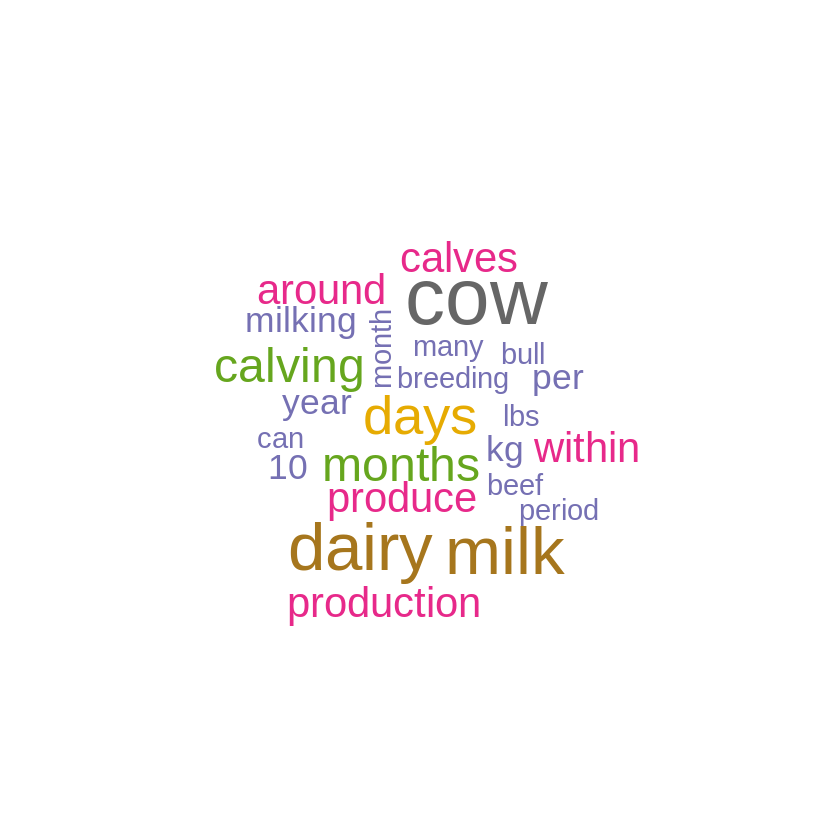

In [ ]:
df_words2 %>%
  with(wordcloud(word, n, colors=brewer.pal(8, "Dark2")))

Visualizing the word frequencies in this format helps illustrate why this type of dimension reduction is oftentimes referred to as reducing text into a **"bag of words"**.

### N-grams

Instead of individual words, however, what if we wanted to look at **sequences of consecutive words**?

An n-gram is a sequence of n words. When n=2, the 2-gram (or bigram) is any two-word sequence of consecutive words such as “this is”, “is a”, “a 2-gram”. This definition can be extended for any sequence of n words, such as 3-grams, 4-grams, and so on.  

When applied to the same passages about dairy cattle, we obtain the following bigram counts:

In [ ]:
df_bigrams <- tibble(text = passages) %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
    mutate(i = row_number()) %>%
    unnest_tokens(word, bigram, drop = FALSE) %>% 
    anti_join(data_frame(word = stopwords)) %>%
    group_by(i) %>%
    filter(n() == 2) %>%
    summarise(bigram = unique(bigram)) %>%
    count(bigram, sort = TRUE)

df_bigrams %>%
  head(10)

Joining, by = "word"


bigram,n
<chr>,<int>
10 months,4
dairy cow,4
milk per,3
per year,3
14 month,2
"17,000 kg",2
305 days,2
"37,500 lbs",2
60 days,2


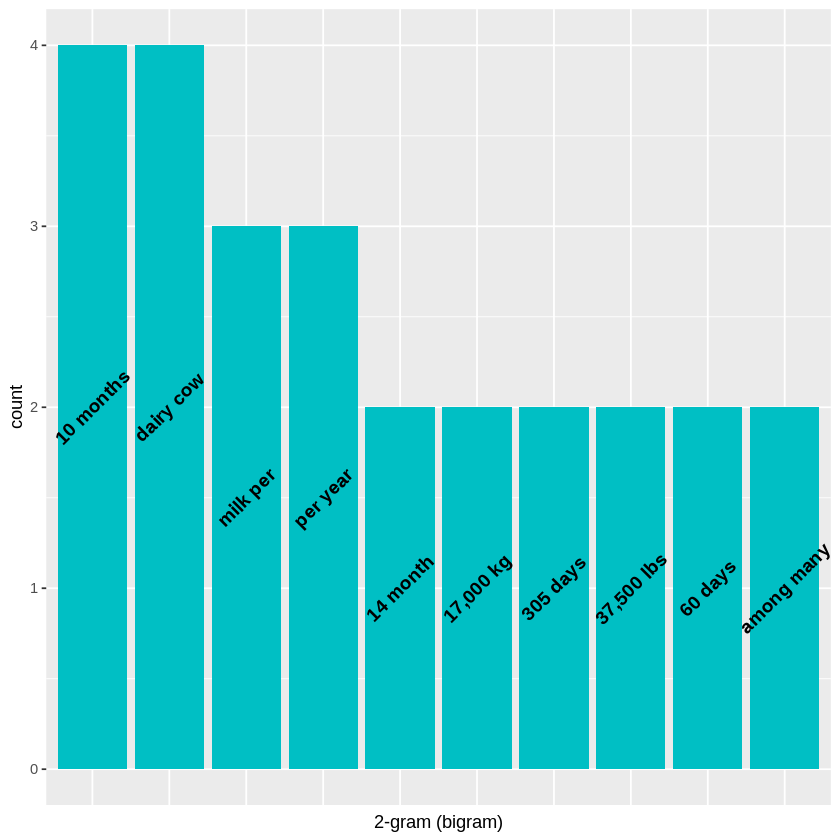

In [ ]:
ggplot(head(df_bigrams, 10), aes(x=reorder(bigram, -n), y=n)) +
    geom_bar(stat="identity", fill=hcl(195,100,65)) +
    geom_text(aes(label=bigram, y=n*0.5), angle=45, colour="black", size=4, fontface='bold') +
    labs(x="2-gram (bigram)", y="count") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

### Tradeoffs: n-grams and sparsity

Pairs of consecutive words may capture context that would be missing when counting single words (for example, the bigrams “dairy cow” and “milk per" are more informative about the content of the passage being about dairy cow milk production than “cow” and “milk”).

However, the bigram counts are also sparser: a typical two-word pair will appear less frequently than either of its component words. This ***increase in sparsity as n increases*** can also be seen when we obtain  3-gram (or trigram) counts for the same passages:

In [ ]:
df_trigrams <- tibble(text = passages) %>%
    unnest_tokens(trigram, text, token = "ngrams", n = 3) %>%
    mutate(i = row_number()) %>%
    unnest_tokens(word, trigram, drop = FALSE) %>% 
    anti_join(data_frame(word = stopwords)) %>%
    group_by(i) %>%
    filter(n() == 2) %>%
    summarise(trigram = unique(trigram)) %>%
    count(trigram, sort = TRUE)

df_trigrams %>%
  head(10)

Joining, by = "word"


trigram,n
<chr>,<int>
of milk per,3
10 months the,2
12 to 14,2
"15,000 to 37,500",2
305 days or,2
"37,500 lbs of",2
40 to 60,2
"6,800 to 17,000",2
60 days after,2


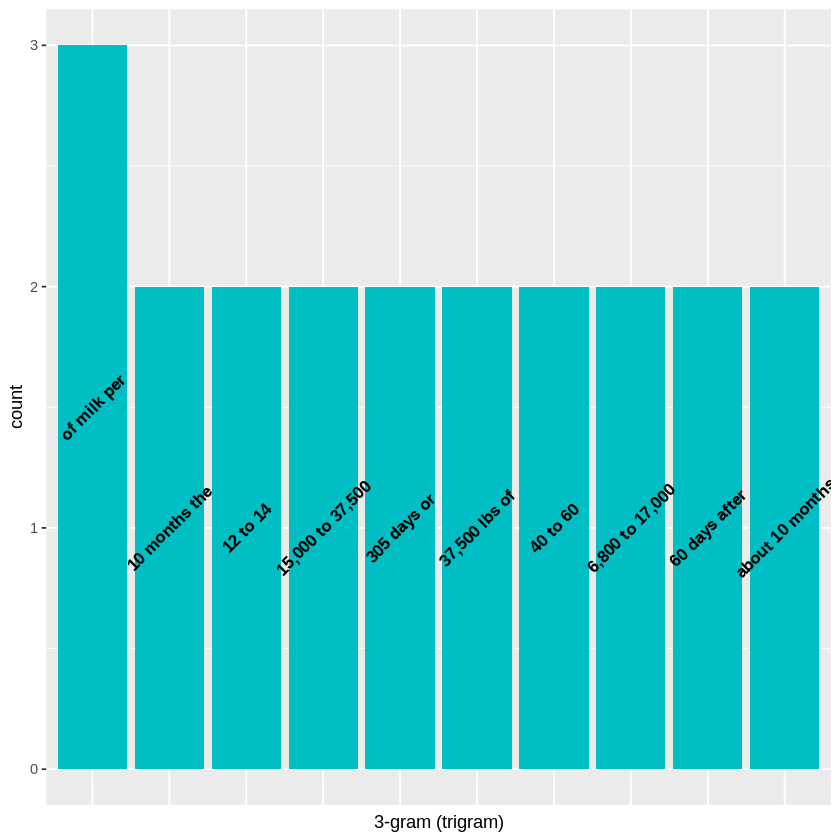

In [ ]:
ggplot(head(df_trigrams, 10), aes(x=reorder(trigram, -n), y=n)) +
    geom_bar(stat="identity", fill=hcl(195,100,65)) +
    geom_text(aes(label=trigram, y=n*0.5), angle=45, colour="black", size=3.5, fontface='bold') +
    labs(x="3-gram (trigram)", y="count") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())

When we compare sparsity between our 1-gram (unigram), 2-gram (bigram), and 3-gram (trigram) frequencies, we confirm that as n increases the number of words and word sequences decreases:

In [ ]:
tbl_words <- df_words %>%
  group_by(n) %>%
  summarise(words = n())

tbl_bigrams <- df_bigrams %>%
  group_by(n) %>%
  summarise(bigrams = n())

tbl_trigrams <- df_trigrams %>%
  group_by(n) %>%
  summarise(trigrams = n())

In [ ]:
tbl_sparsity <- as.data.frame(left_join(left_join(tbl_words, tbl_bigrams, by="n"), tbl_trigrams, by="n")) %>% mutate(across(everything(), .fns = ~replace_na(.,0)))

tbl_sparsity

n,words,bigrams,trigrams
<int>,<int>,<int>,<int>
1,96,85,117
2,51,30,54
3,10,2,1
4,6,2,0
5,5,0,0
6,5,0,0
7,3,0,0
8,3,0,0
9,2,0,0


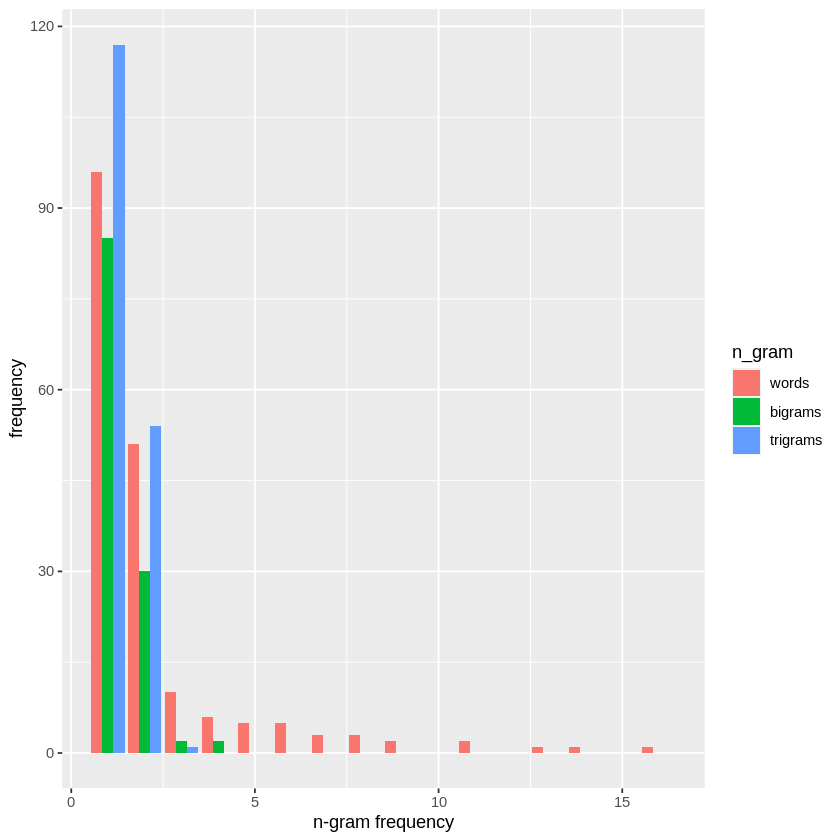

In [ ]:
plt_sparsity <- cbind(as.numeric(rep(tbl_sparsity$n, 3)), tbl_sparsity %>% gather(n, value))
names(plt_sparsity) = c("frequency", "n_gram", "value")
plt_sparsity$n_gram <- factor(plt_sparsity$n_gram, levels = c('words', 'bigrams', 'trigrams'))

ggplot(plt_sparsity, aes(x=frequency, y=value, fill=n_gram)) +
    geom_bar(position="dodge", stat="identity") +
    labs(x="n-gram frequency", y="frequency")

We can see from the plot above that when we reduce the text into words (unigrams), we have larger percentage of words that occur more frequently (n-gram frequency > 4). When we start reducing the text into 2-grams (bigrams) or 3-grams (trigrams), that right side tail gets shorter and we see a smaller percentage of bigrams or trigrams occur more than once.

In summary, using "bag of words" or N-grams to reduce text data into words or sequences of words can be an excellent starting point for exploratory text analysis.  

However, this approach also results in loss of context when we consider situations where the words that are farther apart in a sentence can also be related. Instead, we'll need to use other approaches to understand the associations between words in our text.

## **2) Word2Vec**

Another vectorization method for text is the word2vec model, an algorithm that generates word embeddings, vectors representing each word uniquely. The goal is to generate embeddings that capture syntactic and semantic word similarities. The word2vec model has significant advantages over other text vectorizations allowing words to be represented by dense vectors that retain learned relationships between words. This is as opposed to the bag of words (BOW) model, which effectively vectorizes whole documents with word frequencies. 

**Algorithm**

Word2vec learns word embeddings using a shallow feedforward neural network with an input layer of equal size as the corpus vocabulary, *n*, one hidden layer, and an output layer, both having size equal to the desired embedding length, *k*. The words of the corpus are one hot encoded (each of length *n*), and each enter the architecture input layer, along with information about the context words found nearby them. The output layer uses a softmax activation, aimed at predicting pairs of words given the input. The weights in the hidden layer are repeatedly updated across iterations. The resulting weights are then used directly as the learned word embeddings. Setting *k* determines the size of the embeddings and the size of the hidden and output layers, and often is set to 100-300.  

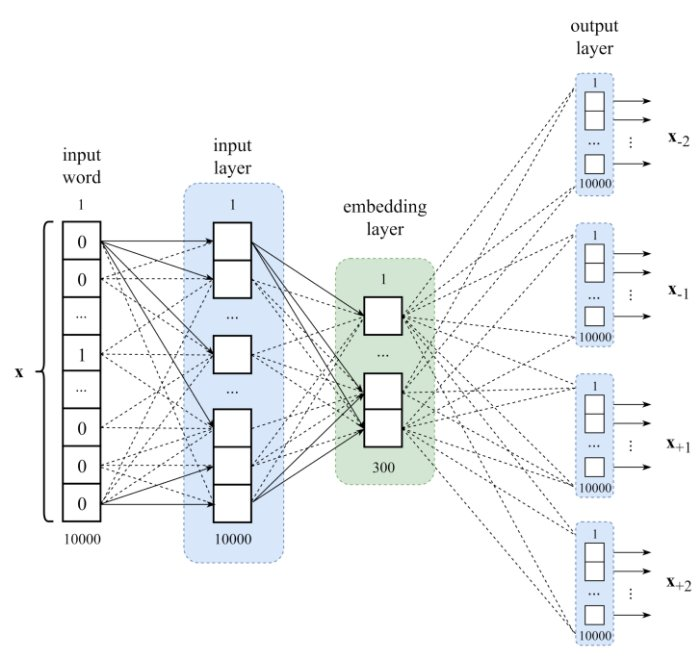

(Source: https://www.kdnuggets.com/2019/01/burkov-self-supervised-learning-word-embeddings.html)


**Advantages**

The advantages of word2vec make it an often used method for vectorization of text. The embeddings produced from the model, unlike BOW or other vectorizations, are dense vectors. Dense vectors, having few or no 0 valued components, are much more efficient and perform much better in machine learning algorithms, as significantly less parameters need estimating. The most significant advantage of word embeddings is the ability to capture latent meaning of words from their distribution in text. This is a common goal in many natural language processing techniques. Words that are more similar will have vectors closer to parallel, and dissimilar words will have vectors more orthogonal to one another. Therefore, the measure of similarity between words is often defined by the cosine similarity measure. The classic example showing how word2vec embeddings can be used to identify relationships between words is as follows:

 $vec(king) - vec(man) + vec(woman) \approx vec(queen)$  

  
**Limitations**

Although powerful, word2vec relies on massive amounts of text data to train "accurate" models. Accuracy is used in quotes because there is actually no way to evaluate the model's accuracy, since word2vec is an unsupervised learning technique, though there have been methods developed to check overall model quality. The big data requirement limits its ability to be trained on corpora of lesser size. But even when a corpus is large enough, the model training is very computationally and time intensive. A solution to this is the use of pre-trained word2vec models, such as one trained on 100 billion words from the Google News dataset. One last limitation to note is that the word embeddings themselves are uninterpretable. 
  
**Applications/Extensions**

Word2vec allows users to skip feature engineering done "by hand" and automatically learn word represenations as vectors. These embeddings can be used in many NLP tasks that make use of word meaning. Examples include part of speech tagging, user recommendations, word prediction, and many others. Additionally, word2vec can be extended to embed text longer than single words. Phrase2vec can embed phrases of variable length, such as learning the embedding for "new_york" rather than both "new" and "york". Meanwhile, doc2vec embeds entire documents as vectors, similar to the BOW model, but has been shown to outperform BOW.
  
**Implementation**
    
Here we will show how to train the word2vec model on our corpus, as well as how to use a pre-trained model for better results.

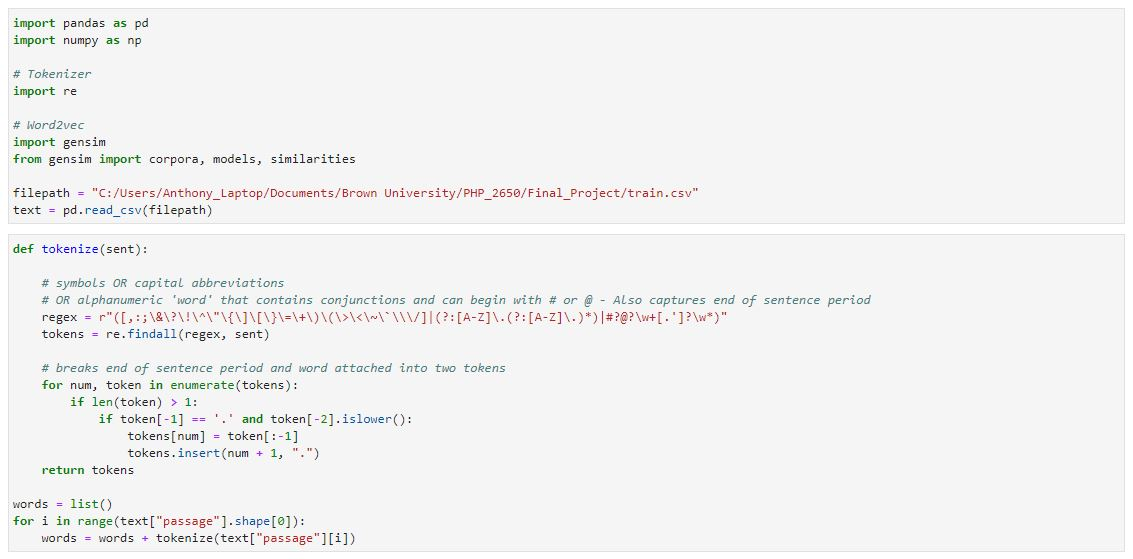

This is the training step. We enter our tokenized list of ordered words, set the vector embedding size to 100, and put no requirement on the mininum count of a word for it to be embedded (could set a minimum greater than 1). 

Our model can now be used to represent words as vectors, although with the training data not being the size needed to effectively train a word2vec model, the result is not great. Still, we can see how vectors are represented, and afterward we will do the same with a pre-trained model. 

For instance, we can print the vector associated with the word 'puppy'. Then we can find the top n words most similar to 'puppy' in our word embeddings. Viewing this list, it is obvious the word embedding model we trained is not accurate.

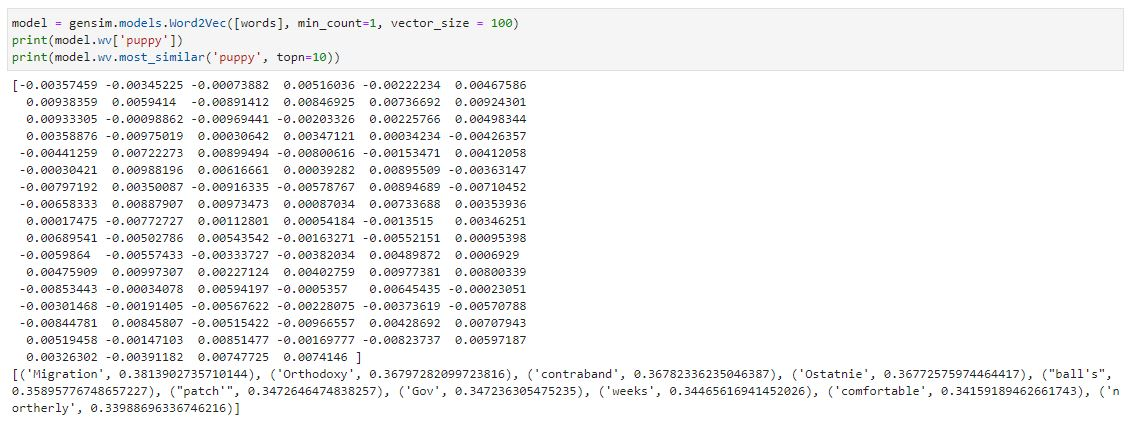

Instead, we can use a commonly used pre-trained word2vec model based on the Google News dataset.  

Viewing the top 10 words most similar to puppy, we can see that it has various relationships with all of the words whether it is a synonym for puppy, a type of dog, the age equivalent for a cat, etc.

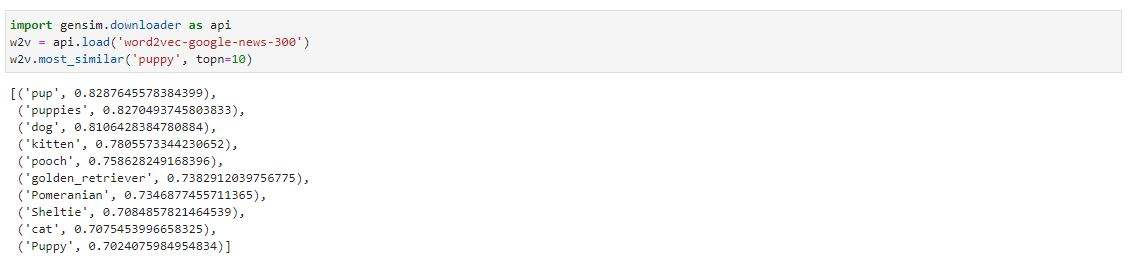

Next, we show the classic word2vec example discussed before.  

Using vector algebra we can find linear combinations of vectors, and check what are the most similar words to the linear combination. As shown below, the resulting most similar words to the expression have to do with royalty, with queen and princess being among the most similar.

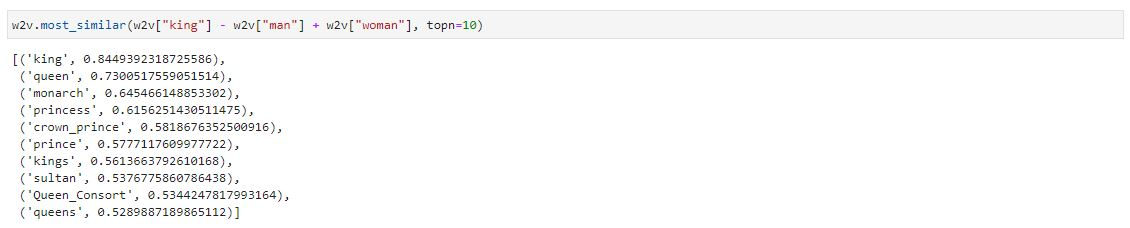

## **3) Topic analysis**

### Background

In addition to learning how to represent individual words, natural language processing can be used to model entire documents into distinct groups, or “topics”. This concept, known as topic modeling, is extremely important when trying to analyze and condense large corpuses of documents. For example, we could take a corpus of newspaper articles and divide them into topics, including politics, entertainment, or sports. Or even better, imaging classifying every Wikipedia document into a set of topics. Considering the time it would take for a human to complete the same task by hand, training a computer to perform topic modeling is extremely valuable. 

One of the first and most relevent breakthroughs in this field was the development of the PageRank algorithm by researchers at Google in the late 1990's. PageRank is the algorithm by which Google sorts recommended web pages based on their relevance to your search query. The algorithm first computes the inverse document frequency (idf) of each word, which is the inverse of how many times a word appears in the entire corpus. This captures how "rare" a word is (a rarer word is likely to be more important for your search query). Next, the algorithm calclates the term frequency (tf) for each document in the corpus. Combining these two quantities (tf-idf) gives a value that represents each document's relevence to a word in your search query. To reduce a document into a single vector, one could map each document to a vector of tf-idf values for each word in the vocabulary. You can read more about the PageRank algorithm [here](https://en.wikipedia.org/wiki/PageRank#History). In fact, PageRank is so popular that Brown's intro to computer science sequence has it's own implementation of PageRank as a [class project](https://hackmd.io/@csci0200/HyY_ZX94q). 

However, a major shortcoming of the PageRank algorithm is that it does not capture inherent similarities between different documents in the corpus. One attempt to address this issue is latent scemantic indexing (LSI) (Deerwester
et al., 1990). This method uses singular value decomposition and the tf-idf values to find a linear subspace that captures as much of the variance in the corpus as possible. This algorithm helps to significantly compress large corpurses and is related to some notions of document similarity. An extension to this algorithm is probabilistic LSI (pLSI), which introduces the idea of "topics" (Hofmann, 1999). This model assumes that each word comes from one topic, and each document is made up of words from these topics. While this proved to be a meaninful alternative to the tf-idf and LSI models, one shortcoming is that words do not necessarity come from only one topic. For example, does the word "buget" come from the "politics", "entertainment", or "education" topic? This issues are addressed in the most widely used topic modeling algoirthm today: Latent Dirchlect Analysis. 

### Latent Dirchlect Analysis

The most common algorithm for topic modeling is known as Latent Dirichlet Allocation (LDA, not to be confused with Linear Discriminant Analysis). This algorithm was first developed by Blei et. al. in 2003. The LDA algorithm is based on two key assumptions: 

1. *Every document is a mixture of topics.* For example, a document titled “Why dogs are better than cats” could be 75% about dogs and 25% about cats.

2. *Every topic is a mixture of words.* For example, a topic on dogs could contain the words “dog”, “puppy”, “bark”; whereas a topic on cats could contain “cat”, “feline”, “purr”. Notably, words can overlap between topics, so the word “fur” could be included in both the dogs and cats topics.

Before delving into the nitty-gritty of LDA, it is important to first define exactly what we mean by a “word”, “document” and “corpus”. These terms are often used in natural language processing to give us some intuition. However, when considering these as inputs to a NLP algorithm it is important to understand their rigorous mathematical definition. 

 * A *word* is a data point taken from a discrete, finite *vocabulary* indexed $\{1,...,V\}$. Each word is represented as a vector of length $V$. The vector contains a single $1$ in the index corresponding to that word in the vocabulary, and $0$ in every other location. For example, if we want to represent the word “dog” in the 3-word vocabulary $\{$“cat”, “dog”, “mouse”$\}$, it would be $w=(0,1,0)$.

* A *document* is a sequence of $N$ words, denoted $\mathbf{w} = \{w_1, w_2, ..., w_n\}$

* A *corpus* is a collection of $M$ documents, denoted $D = \{\mathbf{w_1}, \mathbf{w_2}, ..., \mathbf{w_m}\}$

These definitions are paraphrased from the Blei et. al. paper. It is important to note that these mathematical definitions are not necessarily inherent to text-based data. One could imagine other data types that can be represented as a “word”, “document” and “corpus”. Technically, these alternative data types can also be used in topic modeling. 

LDA is a mathematical tool for estimating both the distribution of topics and words at the same time. LDA accomplishes this through a generative probabilistic model. The documents are represented as a random distribution over latent topics, and the topics are characterized as a distribution over each word. While the Bayesian statistics to estimate these distributions is quite involved, one helpful visualization is show in Figure 4 of the Biel paper (shown below). 



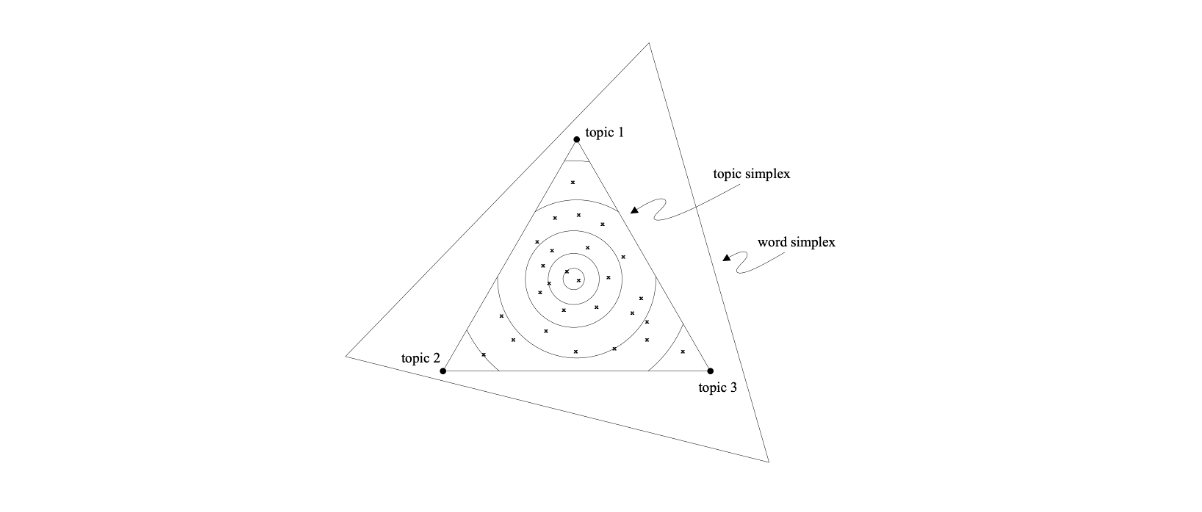

This figure is a representation of how the LDA algorithm works for a corpus of 3 words with 3 topics. The larger triangle is the word simplex. Each corner of the triangle represents where the probability distribution for that word is equal to 1. In other words, the closer you are to one word's corner, the more probable that word is. The smaller triangle (with circular contour lines) is the topic simplex, which is embedded over the word simplex. In a similar vein, each corner of the topic simplex corresponds to one of the three topics. Each "x" is meant to represent one document, which is located somwhere in the topic and word simplexes. Essentially, this figure shows how the two assumptions of LDA work together to place documents into topics based on the topic and word joint probability distributions.

### Implementation

The main package for topic modeling in R is called `topicmodels`. To prepare raw data to be used with the `topicmodels` package, we first need to install a number of relevent libraries. 

In [ ]:
# Install necessary packages
system2('sudo', 'apt-get install libgsl0-dev')
install.packages(c("topicmodels", "tidytext", "quanteda", "reshape2"))

In [ ]:
# libraries
library(tidytext)
library(topicmodels)
library(ggplot2)
library(dplyr)
library(quanteda)
library(reshape2)

Then, we can read in the `train.csv` file like usual. For topic modeling, we are only going to focus on the passages from our BoolQ dataset. Using the `corpus` function from the `quanteda` package, we can convert the raw data into a `corpus` object. Then, we use the `tokens` function from the same package to tokenize each word in the corpus. Lastly, we create a document-feature matrix using the `dfm` function. This is a matrix where each row represents a document and each column represents how many times the word ("feature") shows up in that document. Conveniently, we can also remove stop words (words like "the", "a", or "then") and punctuation at the same time. This is the final object that can be input to the `topicmodels::LDA` function.

In [ ]:
# read in data
df <- read.csv("train.csv")

# process into document-feature matrix
corpus <- corpus(df$passage)
tokens <- tokens(corpus)
dfm <- dfm(tokens, remove = stopwords("english"), remove_punct = TRUE)

Lastly, we run the `LDA` algorithm on our document-feature matrix, opting to divide the corpus into 4 topics. We can visualize the results of this algorithm by looking at the top words within each topic. Interestingly, it seems that topic 1 is about World Cup soccer games, topic 2 is about US news, and topic 4 is about movies and TV. It is slightly less clear what topic 3 is meant to be about.

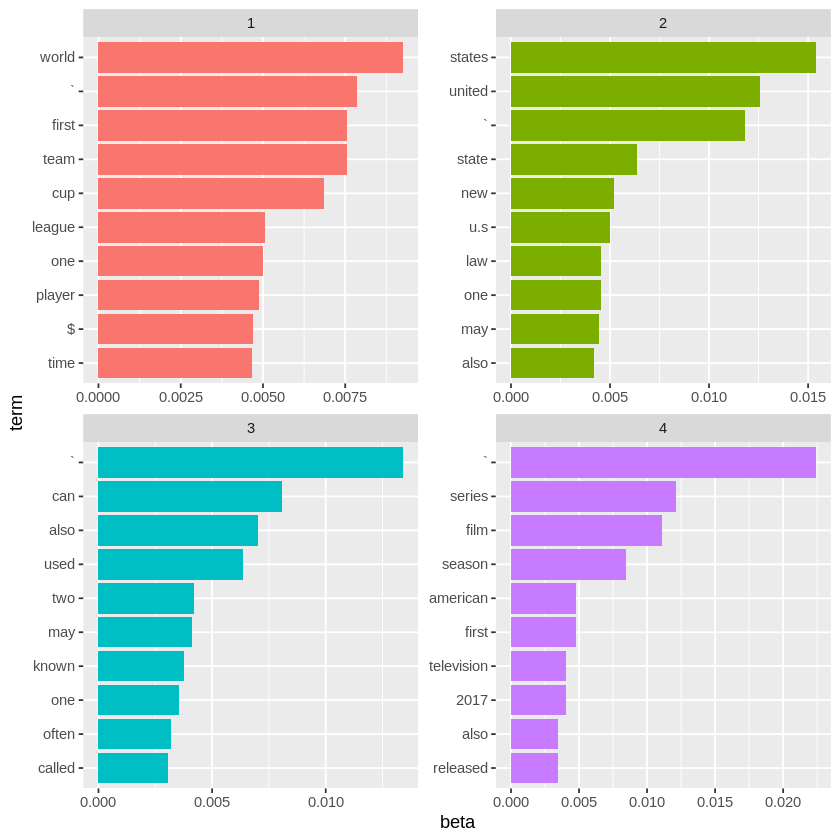

In [ ]:
# fit LDA model
lda_mdl <- LDA(dfm, k=4, control=list(seed = 1234))

# analyze results
topics <- tidy(lda_mdl, matrix = "beta")

top_terms <- topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 10) %>% 
  ungroup() %>%
  arrange(topic, -beta)

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

The main parameter that can be modified by the user in the `LDA` model is `k`, which determines how many topics the corpus is split into. The BoolQ dataset we are using is an interesting candidate for topic modeling because there truly isn't some inherent set of topics in the dataset. We're simply looking at arbitrary reading-comprehension-type passages. Therefore we can opt to choose a larger or smaller `k` and can find unexpected results. 

# **Conclusion**

In this post, we cover three techniques for the dimension reduction and feature extraction of text data. However, there are many approaches and they depend on what applications or research question that you are looking to answer with your analysis!

Future work could look at further exploring these applications, such as:


* Language modeling (can we predict next word occurence from text)?
* Sentiment analysis (can we predict positive or negative sentiment from text?)
* Applications to larger datasets (e.g., Twitter or Yelp APIs, video or audio transcripts, or webscraping other sources of text data)
* Using dimension reduction to predict the yes/no answers in our BoolQ dataset



# **References**

### Dataset

1. C. Clark, K. Lee, M.-W. Chang, T. Kwiatkowski, M. Collins, and K. Toutanova, “BoolQ: Exploring the Surprising Difficulty of Natural Yes/No Questions,” 2019, doi: 10.48550/ARXIV.1905.10044.

### N-Grams
1. Julia Silge and David Robinson. 2017. Text Mining with R: A Tidy Approach (1st. ed.). O'Reilly Media, Inc. https://www.tidytextmining.com/ngrams.html

### Word2Vec



1.   Burkov, Andriy. The Hundred-Page Machine Learning Book. United States, Andriy Burkov, 2019.
2. Rehurek, R., & Sojka, P. (2011). Gensim–python framework for vector space modelling. NLP Centre, Faculty of Informatics, Masaryk University, Brno, Czech Republic, 3(2).
3. Jurafsky, D. (2007). Speech and language processing. Prentice Hall. 
4. Mikolov, Tomas; Chen, Kai; Corrado, Greg; Dean, Jeffrey (2013-09-06). "Efficient Estimation of Word Representations in Vector Space".



### Topic Modeling
1. D. M. Blei, A. Ng, and M. Jordan, “Latent Dirichlet Allocation,” JMLR, vol. 3, pp. 993–1022, Mar. 2003.

2. S. Deerwester, S. T. Dumais, G. W. Furnas, T. K. Landauer, and R. Harshman, “Indexing by latent semantic analysis,” J. Am. Soc. Inf. Sci., vol. 41, no. 6, pp. 391–407, Sep. 1990, doi: 10.1002/(SICI)1097-4571(199009)41:6<391::AID-ASI1>3.0.CO;2-9.

3. T. Hofmann, “Probabilistic latent semantic indexing,” in Proceedings of the 22nd annual international ACM SIGIR conference on Research and development in information retrieval  - SIGIR ’99, Berkeley, California, United States, 1999, pp. 50–57. doi: 10.1145/312624.312649.

4. J. Silge and D. Robinson, Text mining with R: a tidy approach, First edition. Beijing ; Boston: O’Reilly, 2017.
